# Boston housing: a regression example with regularization


The objective is to predict the house price in a certain Boston suburb (in the 1970s).

In [1]:
# Download the data and import stuff

from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [12]:
# Normalize the data and keep 300 samples for training (rest for validation)

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

partial_train_data = train_data[:300]
partial_train_targets = train_targets[:300]
val_data = train_data[300:]
val_targets = train_targets[300:]

#print(partial_train_data.shape)
print(train_data.shape[1])

13


In [5]:
# Build the model and train it
# You can pick what you want from three alternatives, and comment out the two others

model = Sequential()
# 1) This is the model without any regularization
model.add(Dense(64, activation='relu',
            input_shape=(train_data.shape[1],)))
model.add(Dense(64, activation='relu'))
#
# 2) This is the same model with L2 regularization
#model.add(Dense(64, kernel_regularizer=regularizers.l2(0.05), activation='relu',
#            input_shape=(train_data.shape[1],)))
#model.add(Dense(64, kernel_regularizer=regularizers.l2(0.05), activation='relu'))
# 3) This is the same model with dropout
#model.add(Dense(64, activation='relu',
#            input_shape=(train_data.shape[1],)))
#model.add(Dropout(0.2))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.2))
#
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(partial_train_data, partial_train_targets,
                    epochs=400, batch_size=16, verbose=0,
                    validation_data = (val_data, val_targets))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


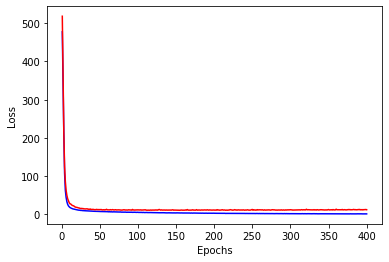

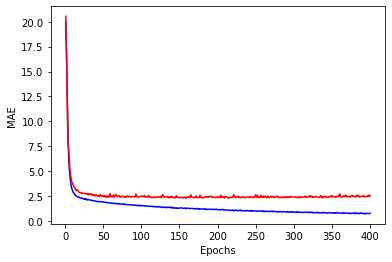

In [6]:
# Plot the loss score and mean absolute error for both training and validation sets

loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

plt.plot(time, loss, 'b-')
plt.plot(time, val_loss, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(time, mae, 'b-')
plt.plot(time, val_mae, 'r-')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

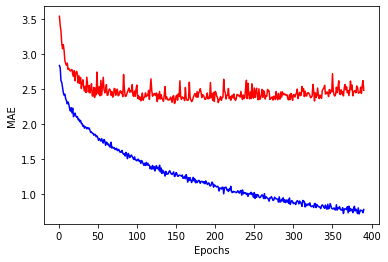

In [10]:
# Cut off the first few MAE data points for clarity

short_mae = mae[10:]
short_val_mae = val_mae[10:]

plt.plot(range(1,len(short_val_mae)+1), short_val_mae, 'r-')
plt.plot(range(1,len(short_mae)+1), short_mae, 'b-')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

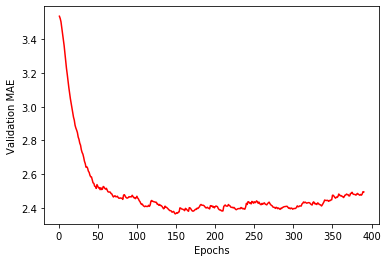

In [9]:
# Smoothen the previous curve to reduce noise

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_val_mae = smooth_curve(val_mae[10:])

plt.plot(range(1, len(smooth_val_mae) + 1), smooth_val_mae,'r-')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [7]:
# Build a fresh model (again, three alternatives) ...

model = Sequential()
# 1) This is the model without any regularization
model.add(Dense(64, activation='relu',
            input_shape=(train_data.shape[1],)))
model.add(Dense(64, activation='relu'))
#
# 2) This is the same model with L2 regularization
#model.add(Dense(64, kernel_regularizer=regularizers.l2(0.05), activation='relu',
#            input_shape=(train_data.shape[1],)))
#model.add(Dense(64, kernel_regularizer=regularizers.l2(0.05), activation='relu'))
# 3) This is the same model with dropout
#model.add(Dense(64, activation='relu',
#            input_shape=(train_data.shape[1],)))
#model.add(Dropout(0.2))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.2))
#
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [13]:
# ... and train it with the entire training data. Select "epochs" from the validation graphs above.
# After that, make the final evaluation with test data.

model.fit(train_data, train_targets, epochs=200, batch_size=16, verbose=1)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Epoch 1/200
404/404 [==============================] - 0s 109us/sample - loss: 2.9909 - mean_absolute_error: 1.1773
Epoch 2/200
404/404 [==============================] - 0s 96us/sample - loss: 2.9516 - mean_absolute_error: 1.2276
Epoch 3/200
404/404 [==============================] - 0s 111us/sample - loss: 2.9761 - mean_absolute_error: 1.1967
Epoch 4/200
404/404 [==============================] - 0s 96us/sample - loss: 2.9692 - mean_absolute_error: 1.2028
Epoch 5/200
404/404 [==============================] - 0s 91us/sample - loss: 2.9662 - mean_absolute_error: 1.2254
Epoch 6/200
404/404 [==============================] - 0s 91us/sample - loss: 2.9453 - mean_absolute_error: 1.2251
Epoch 7/200
404/404 [==============================] - 0s 91us/sample - loss: 2.8968 - mean_absolute_error: 1.2064
Epoch 8/200
404/404 [==============================] - 0s 94us/sample - loss: 2.8553 - mean_absolute_error: 1.1993
Epoch 9/200
404/404 [==============================] - 0s 101us/sample - loss:

404/404 [==============================] - 0s 104us/sample - loss: 2.1571 - mean_absolute_error: 1.0382
Epoch 72/200
404/404 [==============================] - 0s 111us/sample - loss: 2.1516 - mean_absolute_error: 1.0117
Epoch 73/200
404/404 [==============================] - 0s 89us/sample - loss: 2.0494 - mean_absolute_error: 1.0267
Epoch 74/200
404/404 [==============================] - 0s 94us/sample - loss: 2.2276 - mean_absolute_error: 1.0507
Epoch 75/200
404/404 [==============================] - 0s 89us/sample - loss: 2.0420 - mean_absolute_error: 0.9936
Epoch 76/200
404/404 [==============================] - 0s 86us/sample - loss: 2.0961 - mean_absolute_error: 1.0308
Epoch 77/200
404/404 [==============================] - 0s 89us/sample - loss: 2.0995 - mean_absolute_error: 1.0091
Epoch 78/200
404/404 [==============================] - 0s 89us/sample - loss: 1.9562 - mean_absolute_error: 1.0122
Epoch 79/200
404/404 [==============================] - 0s 86us/sample - loss: 2.04

404/404 [==============================] - 0s 94us/sample - loss: 1.5699 - mean_absolute_error: 0.9183
Epoch 142/200
404/404 [==============================] - 0s 91us/sample - loss: 1.5278 - mean_absolute_error: 0.8890
Epoch 143/200
404/404 [==============================] - 0s 89us/sample - loss: 1.4681 - mean_absolute_error: 0.8994
Epoch 144/200
404/404 [==============================] - 0s 86us/sample - loss: 1.5561 - mean_absolute_error: 0.9020
Epoch 145/200
404/404 [==============================] - 0s 89us/sample - loss: 1.5630 - mean_absolute_error: 0.9282
Epoch 146/200
404/404 [==============================] - 0s 84us/sample - loss: 1.5142 - mean_absolute_error: 0.8687
Epoch 147/200
404/404 [==============================] - 0s 84us/sample - loss: 1.5433 - mean_absolute_error: 0.9116
Epoch 148/200
404/404 [==============================] - 0s 96us/sample - loss: 1.4229 - mean_absolute_error: 0.8530
Epoch 149/200
404/404 [==============================] - 0s 84us/sample - loss

In [15]:
print(test_mae_score)

2.6354046
